# My Solution to Exercise 1

In [1]:
import numpy as np
from scipy.linalg import norm
from random import uniform, seed
import matplotlib.pyplot as plt

In [2]:
class Resident(object):
    
    def __init__(self, race, location):
        assert race.lower() == 'orange' or race.lower() == 'green', 'invalid race entered'
        assert type(location) is np.ndarray, 'location not entered as numpy array'
        assert location.shape == (2,), 'coordinates of location invalid'
        self.race = race.lower()
        self.location = location

    def __eq__(self, neighbor):
        if self.get_race() == neighbor.get_race():
            return True
        else:
            return False
        
    def __str__(self):
        return 'Race: '+ self.get_race() + ', Location: ' + str(self.get_location())
    
    def __repr__(self):
        return 'Resident({},{})'.format(self.get_race(), str(self.get_location()))
        
    def get_race(self):
        return self.race
    
    def get_location(self):
        return self.location

    def set_location(self, location):
        assert type(location) is np.ndarray, 'location not entered as numpy array'        
        self.location = location

    def get_neighbors(self, community, location):
        assert type(community) is list, 'invalid community entered'
        neighbor_distances = []
        for member in community:
            distance = norm(location - member.get_location())
            if distance != 0:
                neighbor_distances.append((member, distance))
            
        return [x[0] for x in sorted(neighbor_distances, key = lambda x: x[1])[:10]]
    
    def is_happy(self, community, location):
        assert type(community) is list, 'invalid community entered'
        
        closest_neighbors = self.get_neighbors(community, location)
        similar_neighbor = 0
        
        for neighbor in closest_neighbors:
            if neighbor == self:
                similar_neighbor += 1
                
        if similar_neighbor >= 5:
            return True
        else:
            return False

In [3]:
# Adapted from solution

def plot_distribution(agents, cycle_num):
    "Plot the distribution of agents after cycle_num rounds of the loop."
    x_values_0, y_values_0 = [], []
    x_values_1, y_values_1 = [], []
    # == Obtain locations of each type == #
    for agent in agents:
        x, y = agent.get_location()
        if agent.get_race() == 'orange':
            x_values_0.append(x)
            y_values_0.append(y)
        else:
            x_values_1.append(x)
            y_values_1.append(y)
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_args = {'markersize' : 8, 'alpha' : 0.6}
    ax.set_facecolor('azure')
    ax.plot(x_values_0, y_values_0, 'o', markerfacecolor='orange',  **plot_args)
    ax.plot(x_values_1, y_values_1, 'o', markerfacecolor='green', **plot_args)
    ax.set_title('Cycle {}'.format(cycle_num - 1))
    plt.show()

In [4]:
seed(10)

community = []
cycle_num = 0

for race in ['orange', 'green']:
    for i in range(250):
        location = np.array([uniform(0,1), uniform(0,1)])
        community.append(Resident(race, location))

Entering loop  1


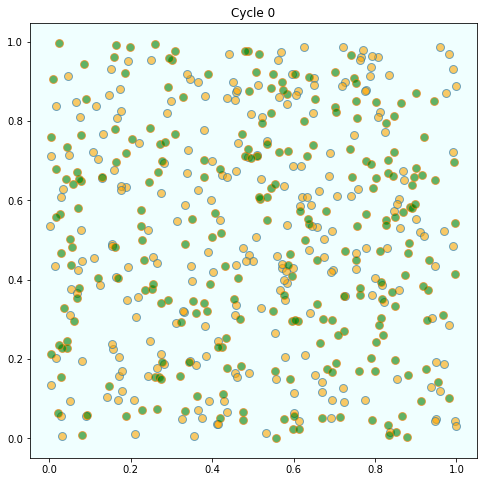

Entering loop  2


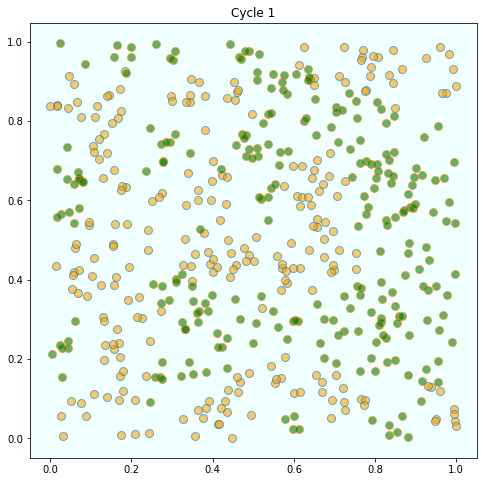

Entering loop  3


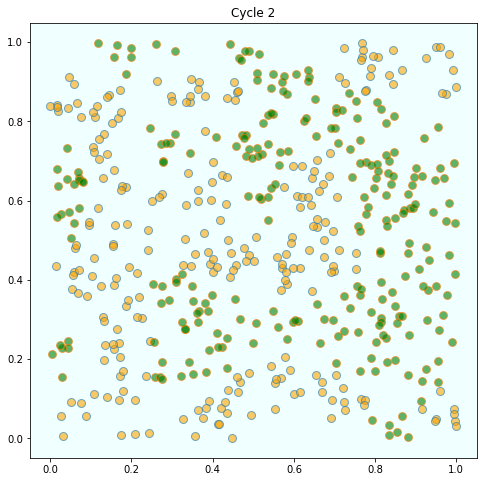

Entering loop  4


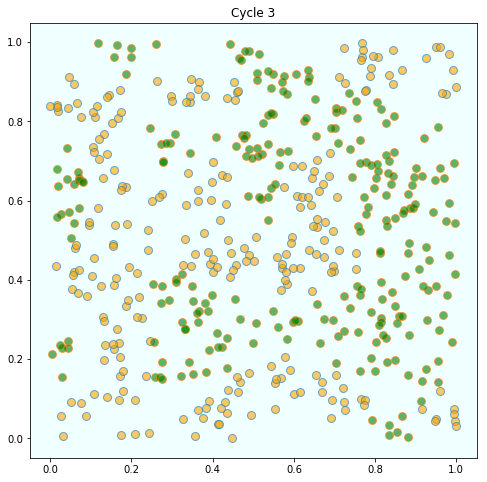

Converged, terminating.


In [5]:
cycle_num = 0

while True:
    cycle_num += 1
    print('Entering loop ', cycle_num)
    plot_distribution(community, cycle_num)
    
    moves = 0

    for person in community:
        while not person.is_happy(community, person.get_location()):
            new_location = np.array([uniform(0,1), uniform(0,1)])
            if person.is_happy(community, new_location):
                person.set_location(new_location)
                moves += 1
                
    if moves == 0:
        print('Converged, terminating.')
        break

# Text Solution to Exercise 1

Entering loop  1


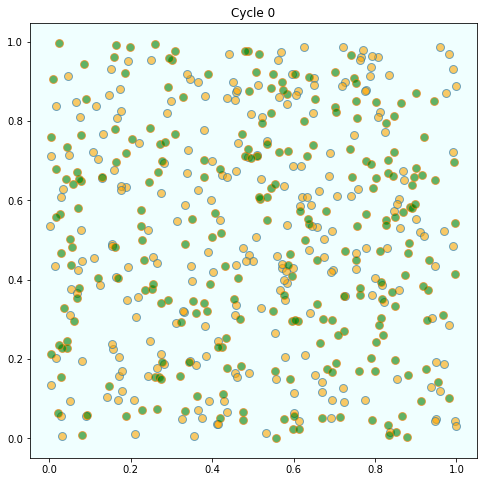

Entering loop  2


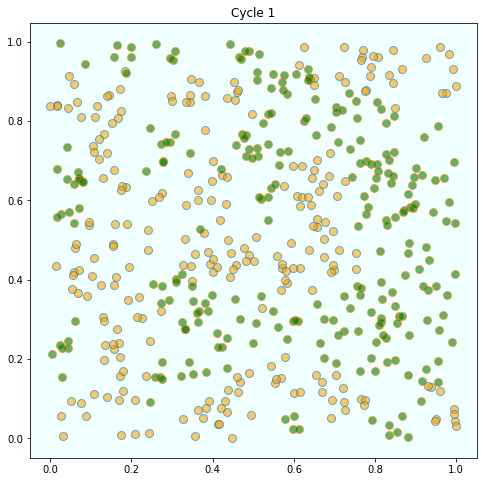

Entering loop  3


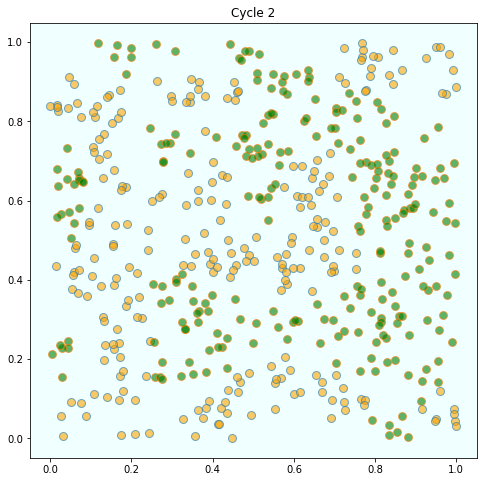

Entering loop  4


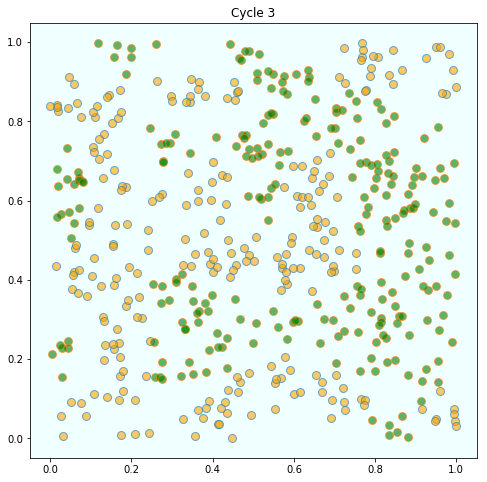

Converged, terminating.


In [6]:
from random import uniform, seed
from math import sqrt
import matplotlib.pyplot as plt

seed(10)  # for reproducible random numbers

class Agent:

    def __init__(self, type):
        self.type = type
        self.draw_location()

    def draw_location(self):
        self.location = uniform(0, 1), uniform(0, 1)

    def get_distance(self, other):
        "Computes euclidean distance between self and other agent."
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return sqrt(a + b)

    def happy(self, agents):
        "True if sufficient number of nearest neighbors are of the same type."
        distances = []
        # distances is a list of pairs (d, agent), where d is distance from
        # agent to self
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        # == Sort from smallest to largest, according to distance == #
        distances.sort()
        # == Extract the neighboring agents == #
        neighbors = [agent for d, agent in distances[:num_neighbors]]
        # == Count how many neighbors have the same type as self == #
        num_same_type = sum(self.type == agent.type for agent in neighbors)
        return num_same_type >= require_same_type

    def update(self, agents):
        "If not happy, then randomly choose new locations until happy."
        while not self.happy(agents):
            self.draw_location()


def plot_distribution(agents, cycle_num):
    "Plot the distribution of agents after cycle_num rounds of the loop."
    x_values_0, y_values_0 = [], []
    x_values_1, y_values_1 = [], []
    # == Obtain locations of each type == #
    for agent in agents:
        x, y = agent.location
        if agent.type == 0:
            x_values_0.append(x)
            y_values_0.append(y)
        else:
            x_values_1.append(x)
            y_values_1.append(y)
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_args = {'markersize' : 8, 'alpha' : 0.6}
    ax.set_facecolor('azure')
    ax.plot(x_values_0, y_values_0, 'o', markerfacecolor='orange',  **plot_args)
    ax.plot(x_values_1, y_values_1, 'o', markerfacecolor='green', **plot_args)
    ax.set_title('Cycle {}'.format(cycle_num - 1))
    plt.show()

# == Main == #

num_of_type_0 = 250
num_of_type_1 = 250
num_neighbors = 10      # Number of agents regarded as neighbors
require_same_type = 5   # Want at least this many neighbors to be same type

# == Create a list of agents == #
agents = [Agent(0) for i in range(num_of_type_0)]
agents.extend(Agent(1) for i in range(num_of_type_1))


count = 1
# ==  Loop until none wishes to move == #
while 1:
    print('Entering loop ', count)
    plot_distribution(agents, count)
    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

print('Converged, terminating.')